# **Ollam multimodal Capability**

## **Install Multimodal LLaVA-Related Packages**

In [1]:
# Install the required packages for multimodal tasks
!pip install llama-index-multi-modal-llms-ollama
!pip install llama-index-readers-file
!pip install unstructured
!pip install llama-index-embeddings-huggingface
!pip install llama-index-vector-stores-qdrant
!pip install llama-index-embeddings-clip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.5 MB/s e

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Linkin_photo.jpg to Linkin_photo.jpg


In [4]:
image_path = 'Linkin_photo.jpg'
print(f"Image path: {image_path}")


Image path: Linkin_photo.jpg


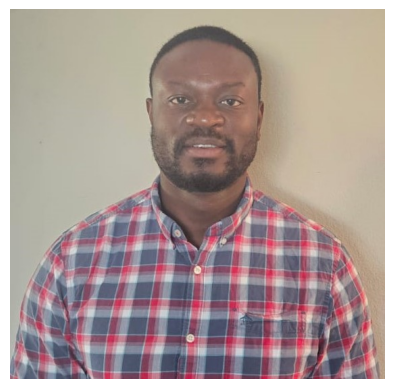

In [22]:
# Display the uploaded image
from PIL import Image
import matplotlib.pyplot as plt

# Load and show the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off the axis
plt.show()


# **Set Up the LLaVA Multimodal Model and Analyze**

In [24]:
# Import and set up the LLaVA multimodal model
from llama_index.multi_modal_llms.ollama import OllamaMultiModal

# Include the missing request_timeout parameter
mm_model = OllamaMultiModal(model="llava:7b", request_timeout=60)

# Display the image for structured data extraction or other tasks
from pathlib import Path
from llama_index.core import SimpleDirectoryReader
from PIL import Image
import matplotlib.pyplot as plt

image_documents = SimpleDirectoryReader("./").load_data()

# Corrected Pydantic schema with nested "analysis" object and handling of list
from pydantic import BaseModel
from typing import List

class AnalysisDetails(BaseModel):
    description: str
    color: str
    object: str

class ImageAnalysis(BaseModel):
    analysis: List[AnalysisDetails]  # Expecting a list of analysis details

# Create the multimodal program
from llama_index.core.program import MultiModalLLMCompletionProgram
from llama_index.core.output_parsers import PydanticOutputParser

prompt_template_str = """\
{query_str}

Return the answer as a Pydantic object. The Pydantic schema is given below:
"""

# Define the program
mm_program = MultiModalLLMCompletionProgram.from_defaults(
    output_parser=PydanticOutputParser(ImageAnalysis),
    image_documents=image_documents,
    prompt_template_str=prompt_template_str,
    multi_modal_llm=mm_model,
    verbose=True,
)

# Run the analysis on your uploaded image with a custom query
response = mm_program(query_str="Describe this image in detail. Also analyze whether the person looks approachable and can be invited for an interview easily.")

# Display the response
for res in response:
    print(res)



> Raw output:  ```json
{
  "image": {
    "url": "https://example.com/image-url",
    "filename": "profile_photo.jpg"
  },
  "analysis": [
    {
      "description": "The person appears to be a middle-aged male with a beard and mustache. He has short, dark hair and is wearing a checkered shirt. The background is plain and light-colored.",
      "color": "The dominant color in the image is blue, primarily from the plaid shirt he's wearing.",
      "object": "A man stands against a wall, looking directly at the camera."
    }
  ]
}
``` 
('analysis', [AnalysisDetails(description='The person appears to be a middle-aged male with a beard and mustache. He has short, dark hair and is wearing a checkered shirt. The background is plain and light-colored.', color="The dominant color in the image is blue, primarily from the plaid shirt he's wearing.", object='A man stands against a wall, looking directly at the camera.')])


In [9]:
!pip install colab-xterm
%load_ext colabxterm
%xterm


The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>

In [10]:
%load_ext colabxterm
%xterm


The colabxterm extension is already loaded. To reload it, use:
  %reload_ext colabxterm


Launching Xterm...

<IPython.core.display.Javascript object>